In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
telco_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
telco_data.shape

(7043, 21)

Dataset consists of 7043 rows and 21 colums 

In [6]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we see that over 75% of the total customer in the system have tenure less than or upto 55 months i.e 4.5 year
Max tenure is 72 months

Text(0.5, 1.0, 'Churn count as per category')

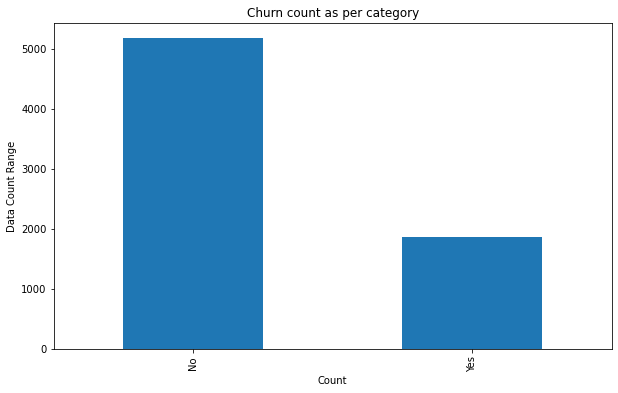

In [8]:
telco_data['Churn'].value_counts().plot(kind='bar',figsize =(10,6))
plt.xlabel("Count")
plt.ylabel("Data Count Range")
plt.title("Churn count as per category")

Here we can see that the customer who churn are less than the customers those who have not churn
The count of the customers those have not churned is approx is 5000+
where as the count of customes who churned to other is approx 1800+

In [9]:
telco_data['Churn'].value_counts()/len(telco_data['Churn'])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

By calculating the ratio for churners and non churnes we see that 73% of total customers are there in our system 
and 26% of total churners in the system have churned to other telcom service provider.

In [10]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
telco_data_copy = telco_data.copy()

In [12]:
telco_data_copy.TotalCharges = pd.to_numeric(telco_data_copy.TotalCharges, errors='coerce' )
telco_data_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we just created the copy of dataset as telco_data_copy in which column with name TotalCharges was not numeric  even though it consisted numeric data.So we converted that column to numeric.
And after converting that column to numeric we can see that all other columns except TotalCharges have no missing while in TotalCharges we have 11 missing values

In [13]:
telco_data_copy.loc[telco_data_copy['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Here we just viewed the rows where TotalCharges data is missing

As there are only 11 records who have missing values so either we can delete those rows or fill those missing values with value as 0

In [14]:
telco_data_copy.fillna(0,inplace=True)

Here we just filled the missing values with '0'

In [15]:
telco_data_copy.TotalCharges = pd.to_numeric(telco_data_copy.TotalCharges, errors='coerce' )
telco_data_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

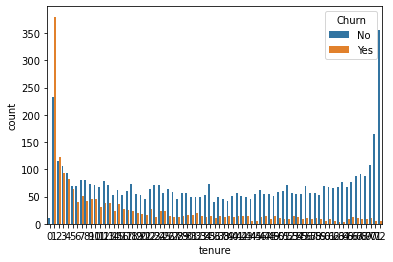

In [16]:
sns.countplot(data=telco_data_copy, x='tenure', hue='Churn')

So as there are 72 months in total and if we plot the graph it is very hard to tell that how many customer and of which tenure got churned and how many are in the system.

So for easier understanding we will create groups of tenure where one group will consist of number of datapoints falling in particular range,Here we will create group of 2 years i.e group of 24 months

In [17]:
'''
label = []
for i in range(1,72,12):
    l = ["{0} - {1}".format(i, i + 11)]
    label.append(l)
print(label)
labels = tuple(label)
'''

labels = ["{0} - {1}".format(i, i + 23) for i in range(1, 72, 24)]
telco_data_copy['tenure_group'] = pd.cut(telco_data_copy.tenure, range(1, 80, 24), right=False, labels=labels)
telco_data_copy['tenure_group'].value_counts()

1 - 24     3199
49 - 72    2239
25 - 48    1594
Name: tenure_group, dtype: int64

As per our use case and data processing any kind of primary key of the database is not included as it does'nt help in processing of data.
Here we have customerID as column which just tells features about the customer like gender,tenure in the system etc So we can drop that

In [18]:
telco_data_copy.drop(columns=['customerID'],axis = 1,inplace=True)
telco_data_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 24
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 24
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 24


So here we just deleted the column named customerID form dataset as it was of no use

Univerate analysis...

<AxesSubplot:xlabel='gender', ylabel='count'>

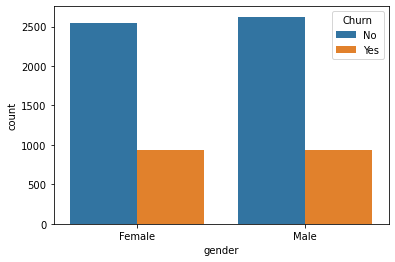

In [19]:
sns.countplot(data=telco_data_copy, x='gender', hue='Churn')

Dataset consists of 7043 records in which 3555 and male customers and remaining 3488 customers are female customers. here we also see that 2500 female customers out of 3488 are in the system and 1500 female customers are churned to other service provider.
Same can be seen with male customers 2500+ out of 3555 have not churned where as remaining customers have churned to other services provider

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

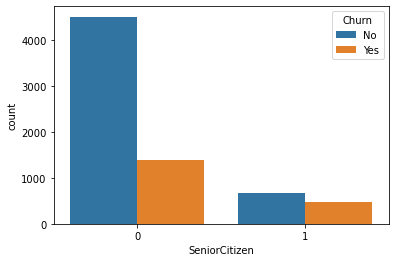

In [20]:
sns.countplot(data=telco_data_copy, x='SeniorCitizen',hue='Churn')

Here 1 means senior citizen and 0 stands for non senior citizen
Near about 4000+ non senior citizens are loyal to there service provider and near about 1200 got churned due to various reasons like network problem or high charges.
And 700 to 800 citizens who are senior citizen got churned and 400 to 500 have not churned.

<AxesSubplot:xlabel='Partner', ylabel='count'>

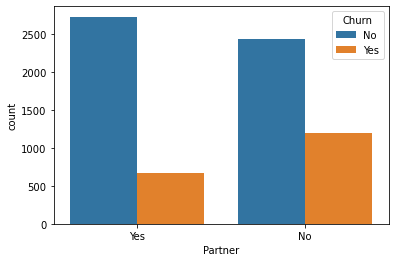

In [21]:
sns.countplot(data=telco_data_copy, x='Partner', hue='Churn')

Here we get an insight that customers with partner are less likely to churn compare to customers with no partner.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

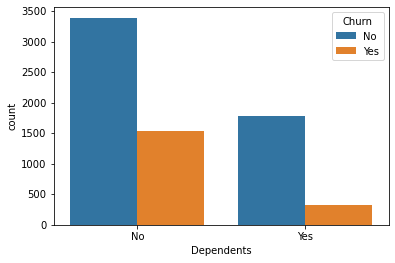

In [22]:
sns.countplot(data=telco_data_copy, x='Dependents', hue='Churn')

Here we see that customers who have dependents like family,parents,wife/husband,childrens etc are having less churning ratio compared to customers who have dependents.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

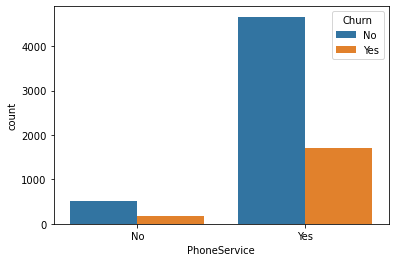

In [23]:
sns.countplot(data=telco_data_copy, x='PhoneService', hue='Churn')

Nearly 650+ customers dont have phone services but some of the customers who dont have phone services but other services like internet services etc got churned and where as customers haveing phone services but not churned are more than customers who have phone services.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

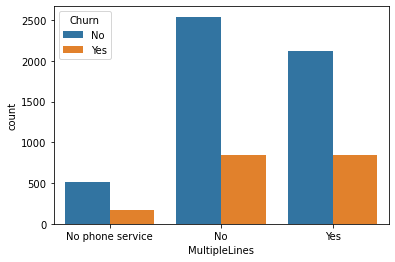

In [24]:
sns.countplot(data=telco_data_copy,x='MultipleLines',hue = 'Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

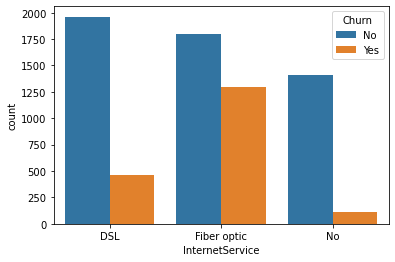

In [25]:
sns.countplot(data=telco_data_copy,x='InternetService',hue='Churn')

Here we clearly see that ratio of customers having fiber optic connection got churned to other services provider is high as compared to dsl connection.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

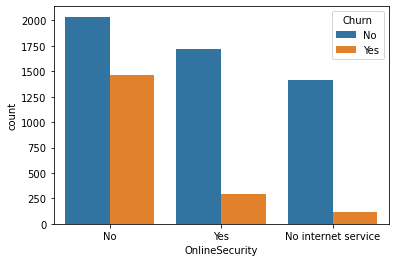

In [26]:
sns.countplot(data=telco_data_copy,x='OnlineSecurity',hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

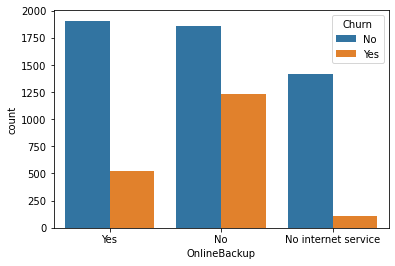

In [27]:
sns.countplot(data=telco_data_copy,x='OnlineBackup',hue='Churn')

Customers who make the use of online backup services have less churning ratio compared to customers not using this services or not having internet services.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

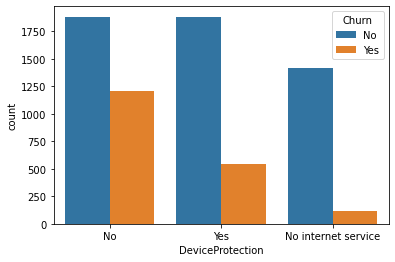

In [28]:
sns.countplot(data=telco_data_copy,x='DeviceProtection',hue='Churn')

DeviceProtection can be said as device insurance. Customers who dont have device protection are more likely to churn as compared to customers having device protection.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

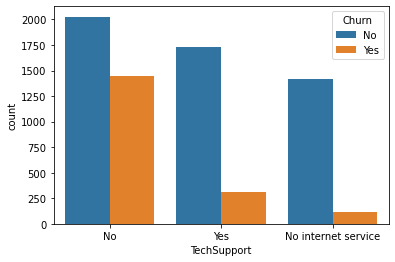

In [29]:
sns.countplot(data=telco_data_copy,x='TechSupport',hue='Churn')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

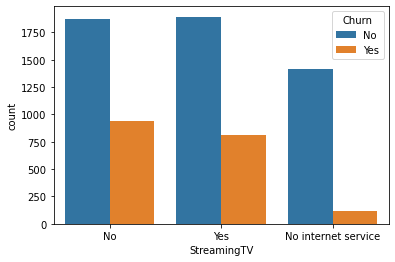

In [30]:
sns.countplot(data=telco_data_copy,x='StreamingTV',hue='Churn')

Customers who dont have subscription for online streaming application churn ratio is slightly more compared to customers having online streaming application subscription.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

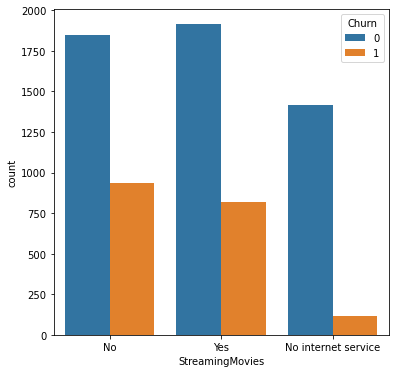

In [43]:
sns.countplot(data=telco_data_copy,x='StreamingMovies',hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

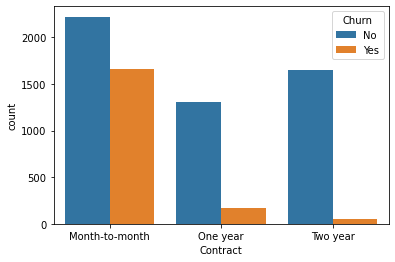

In [31]:
sns.countplot(data=telco_data_copy,x='Contract',hue='Churn')

Customers who have contract of 2 year are the lowest churners following the customers who have 1 year contract who are slightly more churning ratio compared to 2 year contract. But cuntomers with monthly contract have the highest churning ratio which is clearly seen. 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

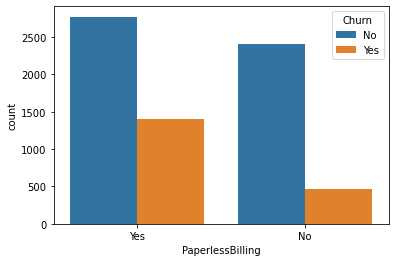

In [32]:
sns.countplot(data=telco_data_copy,x='PaperlessBilling',hue='Churn')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

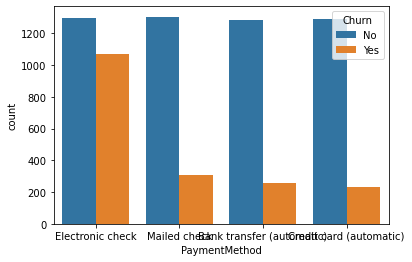

In [33]:
sns.countplot(data=telco_data_copy,x='PaymentMethod',hue='Churn')

In this we see that customers with electronic check are most churners compared to mailed check credit card or bank transfer.

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

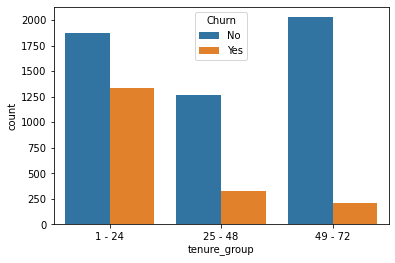

In [34]:
sns.countplot(data=telco_data_copy,x='tenure_group',hue='Churn')

1-24 months or customers with maximum of 2 years tenure are most churners compared to others 25-48 months and 49-72 months

In [35]:
telco_data_copy['Churn'] = np.where(telco_data_copy.Churn == 'Yes',1,0)

In [36]:
telco_data_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 24
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 24
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,25 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 24


Here in this step we just searched churn column for yes and no values. Whenever we found yes as a value we converted that it as 1 and No as 0

Now here we will use dummies function of pandas to convert remaining categorical variables to its dummies 

In [42]:
telco_data_copy_dummies = pd.get_dummies(telco_data_copy)
telco_data_copy_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 24,tenure_group_25 - 48,tenure_group_49 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,1,0,0,0,1,1,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,0,1,0,0,0,1,1,0,0


In [38]:
telco_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

After creating dummies of the columns in the dataset the number of columns in dataset got increase from 21 to 49
Ex- We have contract as one columns with 3 different values like monthly contract,yearly contract and 2 year contract but using dummies we divided that column into 3 different colomns with the name contract_Month, contract_One_Year and Contract_Two_Year which same is done with other columns also. By doing this we got data from all columns in the form of 1's and 0's which was our need.

Text(0, 0.5, 'TotalCharges')

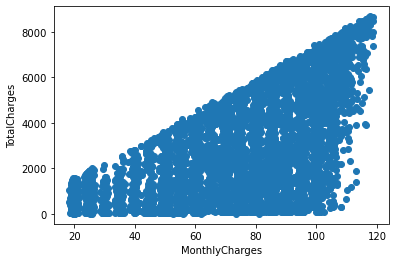

In [39]:
#sns.barplot(data=telco_data_copy, x='MonthlyCharges',y='TotalCharges')
plt.scatter(data=telco_data_copy, x='MonthlyCharges', y='TotalCharges')
plt.rcParams["figure.figsize"] = (6,6)
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')

Here we are finding the relationship between TotalCharges and MonthlyCharges
Here we see that even though our monthly charges are same for many months but there is increase in total charges
we can say that totalcharges is the addition of all the monthly changes for that tenure
So we will say that there is totalcharges increase when ever our monthly charges increases.

In [40]:
telco_data_copy_dummies.to_csv('churn.csv')

# Conculusion

First conculusion is seen that as monthly charges increases total charges also increases.We can say that they are directly proportional to each other.

Next we see that people using paperless billing are more churners compared to people not using paperless billing

Customers using electronic check as there payment method are more likely to churn compared to others

Customers who dont use online security and online backup services are more likely to be churned.

Customers with monthly contract are most churners compared to customers with 1 year and 2 year contracts

And as per the tenure most churners are from group of 1-24 i.e customers in the system for less that or equal to 2 years